<a id='top'></a>
# Data Manipulation with Pandas and plotting with Matplotlib
This notebook contains an overview of basic Pandas functionalities.

- Installing pandas: http://pandas.pydata.org/pandas-docs/stable/install.html
- Installing matplotlib: https://matplotlib.org/users/installing.html

## Table of Contents
1. [Series](#series) 
    1. [Create](#sa)
    2. [Index and Slice](#sb)
    3. [Adding/Merging](#sc)
2. [DataFrames](#dataframes) 
    1. [Create and Access](#da)
    2. [Load a DataFrame from csv file](#db)
    3. [Reshape](#dc)
    4. [Data Transformation](#de)

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<a id='series'></a>
## 1. Series ([to top](#top))

Pandas Series are **one-dimensional** labeled arrays capable of holding any data type (integers, strings, floating point numbers...) <br/>
The axis labels are collectively referred to as the **index**. 

<a id='sa'></a>
### 1.A Create ([to top](#top))
Pandas Series can be build by leveraging different data types

From numerical data

In [4]:
my_data = [10,20,30]
my_series = pd.Series(my_data)
print(my_series)

0    10
1    20
2    30
dtype: int64


In [5]:
my_data

[10, 20, 30]

In [6]:
type(my_data), type(my_series)

(list, pandas.core.series.Series)

From numerical data and corresponding index (row labels)

In [7]:
labels = ['A','B','C']
pd.Series(my_data, index=labels)

A    10
B    20
C    30
dtype: int64

Just using a pre-defined dictionary

In [8]:
d = {'A':10,'B':20,'C':30}
pd.Series(d)

A    10
B    20
C    30
dtype: int64

<a id='sb'></a>
### 1.B Index and Slice ([to top](#top))
Series can be indexed and sliced

In [9]:
ser = pd.Series([1, 2, 3, 4], ['A', 'B', 'C', 'D'])
print(ser)

A    1
B    2
C    3
D    4
dtype: int64


In [10]:
print("by name, A:", ser['A'])
print("by positional value in the series, A:", ser[0])
print("by range, B:D\n", ser[1:4])

by name, A: 1
by positional value in the series, A: 1
by range, B:D
 B    2
C    3
D    4
dtype: int64


<a id='sc'></a>
### 1.C Adding/Merging  ([to top](#top))
Series havin having common indices can be combined

In [11]:
ser1 = pd.Series([1, 2, 3, 4], ['A', 'B', 'C', 'D'])
ser2 = pd.Series([1, 2, 5, 4], ['A', 'B', 'E', 'D'])
ser3 = ser1+ser2

After adding the two series, the result looks like this...

In [12]:
ser3

A    2.0
B    4.0
C    NaN
D    8.0
E    NaN
dtype: float64

Python tries to add values where it finds common index name, and puts NaN where indices are missing <br/>
The same happens for all possible operations (e.g., product)

In [13]:
ser1*ser2

A     1.0
B     4.0
C     NaN
D    16.0
E     NaN
dtype: float64

<a id='dataframes'></a>
## 2. DataFrame ([to top](#top))
A DataFrame is a **2-dimensional** labeled data structure with columns of potentially different types. <br/>
You can think of it like a spreadsheet or SQL table, or a dict of Series objects. <br/>
It is generally the most commonly used pandas object.

In [14]:
from numpy.random import randn as rn

<a id='da'></a>
### 2.A Create and Access ([to top](#top))
We start generating some random data...

In [15]:
np.random.seed()
matrix_data = rn(5,4) #5 rows and 4 columns
matrix_data

array([[ 1.93869218, -0.97075198,  0.27079877, -0.53688234],
       [-1.25677219, -0.60210687, -1.29852645,  0.50706581],
       [-2.06917288,  0.0085259 ,  0.02186569,  1.08928764],
       [ 0.52257266,  0.77897221,  0.681559  , -0.30519927],
       [ 2.19216692,  0.67505866,  0.11034134,  0.20483298]])

Now we can transform such random matrix in a DataFrame

In [16]:
row_labels = ['A','B','C','D','E']
column_headings = ['W','X','Y','Z']

df = pd.DataFrame(data=matrix_data, index=row_labels, columns=column_headings)
df

,W,X,Y,Z
A,1.938692,-0.970752,0.270799,-0.536882
B,-1.256772,-0.602107,-1.298526,0.507066
C,-2.069173,0.008526,0.021866,1.089288
D,0.522573,0.778972,0.681559,-0.305199
E,2.192167,0.675059,0.110341,0.204833


<a id='db'></a>
### 2.B Load a DataFrame from csv file ([to top](#top))
Datasets formatted as csv files can be easily loaded into a DataFrame

In [17]:
titanic = pd.read_csv("data/titanic_passengers.csv")

In [18]:
titanic.head()

,PassengerId,Name,Sex,Age,SibSp,Parch
0,1,"Braund, Mr. Owen Harris",male,22.0,1,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0
4,5,"Allen, Mr. William Henry",male,35.0,0,0


Simple statistics can be obtained through the *describe* method

In [19]:
titanic.describe()

,PassengerId,Age,SibSp,Parch
count,891.000000,714.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594
std,257.353842,14.526497,1.102743,0.806057
min,1.000000,0.420000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000
50%,446.000000,28.000000,0.000000,0.000000
75%,668.500000,38.000000,1.000000,0.000000
max,891.000000,80.000000,8.000000,6.000000


Or with the *info* one

In [20]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
PassengerId    891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 41.9+ KB


<a id='dc'></a>
### 2.C Reshape ([to top](#top))
DataFrame structures can be reshaped in several ways in order to facilitate the analysis of the data they describe 

<a id='dc1'></a>
### 2.C.a Index and Slice Columns ([to top](#top))

Slicing a single column produces a Series...

In [21]:
titanic['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [22]:
type(titanic['Age'])

pandas.core.series.Series

An alternative syntax to access a single column is the *dot* notation

In [23]:
titanic.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

#### Unique values

In [24]:
titanic['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [25]:
titanic['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

#### DataFrame Filter

To obtain a DataFrame an additional bracket must be used

In [26]:
titanic[['Age']].head()

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


In [27]:
type(titanic[['Age']])

pandas.core.frame.DataFrame

In [28]:
titanic[['Age','Sex']].head() # Multiple selection

,Age,Sex
0,22.0,male
1,38.0,female
2,26.0,female
3,35.0,female
4,35.0,male


<a id='dc2'></a>
### 2.C.b Select/index Rows ([to top](#top))
Rows can be indexed by **label** as well as by **index**

In [29]:
titanic.loc[[1, 2]] # select the first and the second columns

,PassengerId,Name,Sex,Age,SibSp,Parch
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0


In [30]:
titanic.iloc[[1,2]] # equivalent to the previous one

,PassengerId,Name,Sex,Age,SibSp,Parch
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0


<a id='dc3'></a>
### 2.C.c Create and Delete Columns/Rows ([to top](#top))

Adding a novel column combining existing ones

In [31]:
titanic['Family'] = titanic['SibSp'] + titanic['Parch']
titanic.head()

,PassengerId,Name,Sex,Age,SibSp,Parch,Family
0,1,"Braund, Mr. Owen Harris",male,22.0,1,0,1
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,1
4,5,"Allen, Mr. William Henry",male,35.0,0,0,0


Deleting an existing column

In [32]:
titanic = titanic.drop('Parch', axis=1)
titanic = titanic.drop('SibSp', axis=1)
titanic.head()

,PassengerId,Name,Sex,Age,Family
0,1,"Braund, Mr. Owen Harris",male,22.0,1
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1
4,5,"Allen, Mr. William Henry",male,35.0,0


Deleting a row (index) by using df.drop() method and axis=0

In [33]:
titanic1 = titanic.drop(0, axis=0) # it is not saved in titanic
titanic1.head()

,PassengerId,Name,Sex,Age,Family
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1
4,5,"Allen, Mr. William Henry",male,35.0,0
5,6,"Moran, Mr. James",male,NaN,0


In [34]:
titanic.head()

,PassengerId,Name,Sex,Age,Family
0,1,"Braund, Mr. Owen Harris",male,22.0,1
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1
4,5,"Allen, Mr. William Henry",male,35.0,0


Updates can be performed **inplace** (without reasigning to a variable) by setting inplace=True

In [35]:
titanic.drop(0, axis=0, inplace=True)
titanic.head()

,PassengerId,Name,Sex,Age,Family
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1
4,5,"Allen, Mr. William Henry",male,35.0,0
5,6,"Moran, Mr. James",male,NaN,0


<a id='dc4'></a>
### 2.C.d Subset ([to top](top))
Accessing an element in position (D,Y)

In [36]:
titanic.loc[2,'Age'] # index is 2 and column is Age

26.0

Slicing by rows and columns at the same time

In [37]:
titanic.loc[[2, 3],['Age','Sex']]

,Age,Sex
2,26.0,female
3,35.0,female


<a id='dc4'></a>
### 2.C.e Conditional Selection ([to top](#top))
Logical operators can be applied to DataFrame to perform filtering and selections

**Example:** a boolean DataFrame where we are checking if the values are greater than 0

In [38]:
booldf = titanic>0
booldf.head()

TypeError: '>' not supported between instances of 'str' and 'int'

A bolean DataFrame can also be used to filter the original values

In [39]:
titanic[booldf].head()

NameError: name 'booldf' is not defined

#### Conditionally subset a DataFrame with Boolean series
Let's define a DataFrame describing individuals measurements

We can filter it easily by specifying a condition on the cell values

In [40]:
titanic[titanic['Age']>35].head()

,PassengerId,Name,Sex,Age,Family
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1
6,7,"McCarthy, Mr. Timothy J",male,54.0,0
11,12,"Bonnell, Miss. Elizabeth",female,58.0,0
13,14,"Andersson, Mr. Anders Johan",male,39.0,6
15,16,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0


Multiple conditions can be stacked together using boolean operators

In [41]:
booldf1 = titanic['Age']>35
booldf2 = titanic['Family']>2

In [42]:
booldf2

1      False
2      False
3      False
4      False
5      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Family, Length: 890, dtype: bool

In [43]:
titanic[(booldf1) & (booldf2)].head()

,PassengerId,Name,Sex,Age,Family
13,14,"Andersson, Mr. Anders Johan",male,39.0,6
25,26,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,6
167,168,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,5
360,361,"Skoog, Mr. Wilhelm",male,40.0,5
390,391,"Carter, Mr. William Ernest",male,36.0,3


Filtering results can be subsetted as usual selecting rows/columns

In [44]:
titanic[booldf1][['Age','Sex']].head()

,Age,Sex
1,38.0,female
6,54.0,male
11,58.0,female
13,39.0,male
15,55.0,female


<a id='dc5'></a>
### 2.C.f Re-setting and Setting Index ([to top](#top))
In the previuos example we specified an index. <br/>
We can destroy such index (making it a simple column of the DataFrame) easily

In [45]:
titanic.reset_index().head()

,index,PassengerId,Name,Sex,Age,Family
0,1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1
1,2,3,"Heikkinen, Miss. Laina",female,26.0,0
2,3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1
3,4,5,"Allen, Mr. William Henry",male,35.0,0
4,5,6,"Moran, Mr. James",male,NaN,0


Conversely, if we do not need such additional column we can drop it contextually

In [46]:
titanic.reset_index(drop=True).head()

,PassengerId,Name,Sex,Age,Family
0,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1
1,3,"Heikkinen, Miss. Laina",female,26.0,0
2,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1
3,5,"Allen, Mr. William Henry",male,35.0,0
4,6,"Moran, Mr. James",male,NaN,0


Now we can add a new column and set it as new index

In [47]:
titanic.set_index('Name').head()

,PassengerId,Sex,Age,Family
Name,,,,
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,female,38.0,1
"Heikkinen, Miss. Laina",3,female,26.0,0
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,female,35.0,1
"Allen, Mr. William Henry",5,male,35.0,0
"Moran, Mr. James",6,male,NaN,0


<a id='dc5'></a>
### 2.C.g Multi-indexing ([to top](#top))
DataFrame indexes can have multiple levels <br/>
We can define a two level index as follows:

In [48]:
t2 = titanic[['Name', 'Family', 'Age']]
t2.head()

,Name,Family,Age
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0
2,"Heikkinen, Miss. Laina",0,26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0
4,"Allen, Mr. William Henry",0,35.0
5,"Moran, Mr. James",0,NaN


In [49]:
t2.set_index(['Family', 'Age'], inplace=True)
t2.head()

Name
Family Age                                                    
1      38.0  Cumings, Mrs. John Bradley (Florence Briggs Th...
0      26.0                             Heikkinen, Miss. Laina
1      35.0       Futrelle, Mrs. Jacques Heath (Lily May Peel)
0      35.0                           Allen, Mr. William Henry
       NaN                                    Moran, Mr. James

For sake of clarity we can rename the indexes as follows

In [50]:
t2.index.names=['Outer', 'Inner']
t2.head()

Name
Outer Inner                                                   
1     38.0   Cumings, Mrs. John Bradley (Florence Briggs Th...
0     26.0                              Heikkinen, Miss. Laina
1     35.0        Futrelle, Mrs. Jacques Heath (Lily May Peel)
0     35.0                            Allen, Mr. William Henry
      NaN                                     Moran, Mr. James

Subsetting now becomes trikier, but the syntax remains the same. <br/>
We can select the subset (38.0)(Name) of Outer=1 by using the *loc* function twice

In [51]:
t2.loc[1].loc[[38.0]][['Name']]

,Name
Inner,
38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
38.0,"Hoyt, Mr. Frederick Maxfield"
38.0,"Graham, Mr. George Edward"


<a id='de'></a>
## 3. Data Transformation ([to top](#top))
Data stored in a DataFrame can be transformed applying several functions.

<a id='de1'></a>
### 3.A Missing Values ([to top](#top))
In presence of missing values different policies can be selected

#### Dropping any rows with a NaN value

In [52]:
titanic.head()

,PassengerId,Name,Sex,Age,Family
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1
4,5,"Allen, Mr. William Henry",male,35.0,0
5,6,"Moran, Mr. James",male,NaN,0


In [53]:
titanic.dropna(axis=0).head()

,PassengerId,Name,Sex,Age,Family
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1
4,5,"Allen, Mr. William Henry",male,35.0,0
6,7,"McCarthy, Mr. Timothy J",male,54.0,0


#### Dropping any columns with NaN value

In [54]:
titanic.dropna(axis=1).head()

,PassengerId,Name,Sex,Family
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1
2,3,"Heikkinen, Miss. Laina",female,0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1
4,5,"Allen, Mr. William Henry",male,0
5,6,"Moran, Mr. James",male,0


#### Thresholding: dropping a row with a minimum 5 NaN

In [55]:
titanic.dropna(axis=0, thresh=5).head()

,PassengerId,Name,Sex,Age,Family
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1
4,5,"Allen, Mr. William Henry",male,35.0,0
6,7,"McCarthy, Mr. Timothy J",male,54.0,0


#### Filling values with a default value

In [56]:
titanic.fillna(value='Immortal').head()

,PassengerId,Name,Sex,Age,Family
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1
2,3,"Heikkinen, Miss. Laina",female,26,0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1
4,5,"Allen, Mr. William Henry",male,35,0
5,6,"Moran, Mr. James",male,Immortal,0


#### Filling values with a computed value (e.g., mean of column A)

In [57]:
# generally used to substitute missing data
titanic.fillna(value={'Age': titanic['Age'].mean()}).head()

,PassengerId,Name,Sex,Age,Family
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1
2,3,"Heikkinen, Miss. Laina",female,26.000000,0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1
4,5,"Allen, Mr. William Henry",male,35.000000,0
5,6,"Moran, Mr. James",male,29.709916,0


<a id='de2'></a>
### 3.B GroupBy ([to top](#top))
DataFrames allow to group rows by column values so to compute aggregated statistics (i.e., sum, mean...)

In [58]:
t3 = titanic.groupby('Family')
t3[['Age']].mean()

,Age
Family,
0,32.220297
1,31.459565
2,26.035806
3,18.274815
4,20.818182
5,18.409091
6,15.166667
7,15.666667
10,NaN


In [59]:
t4 = pd.DataFrame(titanic[['Age', 'Family']].groupby('Family').describe())
t4

Age                                                      
        count       mean        std   min    25%   50%    75%   max
Family                                                             
0       404.0  32.220297  12.899871  5.00  22.00  29.5  39.00  80.0
1       138.0  31.459565  13.509524  0.42  22.00  29.5  42.00  65.0
2        93.0  26.035806  16.542123  0.67  15.00  27.0  37.00  70.0
3        27.0  18.274815  14.304131  0.75   3.50  23.0  28.00  48.0
4        11.0  20.818182  17.069377  2.00   8.50  18.0  25.00  54.0
5        22.0  18.409091  17.388171  1.00   4.75  12.0  24.00  64.0
6        12.0  15.166667  14.732977  2.00   4.75   9.0  22.25  39.0
7         6.0  15.666667  14.361987  1.00   9.50  12.5  15.50  43.0
10        0.0        NaN        NaN   NaN    NaN   NaN    NaN   NaN

In order to select a single row of the resulting DataFrame it is necessary to:
- access it via *loc*
- transpose the results

In [60]:
titanic_first_class = pd.DataFrame(t4.loc[1])
titanic_first_class

1
Age count  138.000000
    mean    31.459565
    std     13.509524
    min      0.420000
    25%     22.000000
    50%     29.500000
    75%     42.000000
    max     65.000000

In [61]:
titanic_first_class.transpose()

Age                                                    
   count       mean        std   min   25%   50%   75%   max
1  138.0  31.459565  13.509524  0.42  22.0  29.5  42.0  65.0

The latter operation is not required if the selection is on multiple rows

In [62]:
titanic[['Age', 'Family']].groupby('Family').describe().loc[[1, 2, 3]]

Age                                                    
        count       mean        std   min   25%   50%   75%   max
Family                                                           
1       138.0  31.459565  13.509524  0.42  22.0  29.5  42.0  65.0
2        93.0  26.035806  16.542123  0.67  15.0  27.0  37.0  70.0
3        27.0  18.274815  14.304131  0.75   3.5  23.0  28.0  48.0

<a id='de3'></a>
### 3.C Concatenation ([to top](#top))

DataFrames can be easily contatenated by row as well as by column

In [63]:
trip = pd.read_csv("data/titanic_status.csv")
trip.head()

,PassengerId,Survived,Pclass,Embarked,Cabin,Ticket,Fare
0,2,1,1,C,C85,PC 17599,71.2833
1,3,1,3,S,NaN,STON/O2. 3101282,7.9250
2,4,1,1,S,C123,113803,53.1000
3,5,0,3,S,NaN,373450,8.0500
4,6,0,3,Q,NaN,330877,8.4583


In [64]:
passengers = pd.read_csv("data/titanic_passengers.csv")
passengers.head()

,PassengerId,Name,Sex,Age,SibSp,Parch
0,1,"Braund, Mr. Owen Harris",male,22.0,1,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0
4,5,"Allen, Mr. William Henry",male,35.0,0,0


In [65]:
column_concat = pd.concat([passengers, trip], axis=1)
column_concat.head()

,PassengerId,Name,Sex,Age,SibSp,Parch,PassengerId,Survived,Pclass,Embarked,Cabin,Ticket,Fare
0,1,"Braund, Mr. Owen Harris",male,22.0,1,0,2.0,1.0,1.0,C,C85,PC 17599,71.2833
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,3.0,1.0,3.0,S,NaN,STON/O2. 3101282,7.9250
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,4.0,1.0,1.0,S,C123,113803,53.1000
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,5.0,0.0,3.0,S,NaN,373450,8.0500
4,5,"Allen, Mr. William Henry",male,35.0,0,0,6.0,0.0,3.0,Q,NaN,330877,8.4583


Filling NaN with a fixed value

In [66]:
column_concat.fillna(value=0, inplace=True)
column_concat.head()

,PassengerId,Name,Sex,Age,SibSp,Parch,PassengerId,Survived,Pclass,Embarked,Cabin,Ticket,Fare
0,1,"Braund, Mr. Owen Harris",male,22.0,1,0,2.0,1.0,1.0,C,C85,PC 17599,71.2833
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,3.0,1.0,3.0,S,0,STON/O2. 3101282,7.9250
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,4.0,1.0,1.0,S,C123,113803,53.1000
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,5.0,0.0,3.0,S,0,373450,8.0500
4,5,"Allen, Mr. William Henry",male,35.0,0,0,6.0,0.0,3.0,Q,0,330877,8.4583


<a id='de4'></a>
### 3.D Merging ([to top](#top))
DataFrames can be merged if they share a **common key**. <br/>
The merge function allows you to merge DataFrames together using a similar logic as merging SQL Tables together.

In [67]:
merge1 = pd.merge(passengers, trip,on=['PassengerId'])
merge1.head()

,PassengerId,Name,Sex,Age,SibSp,Parch,Survived,Pclass,Embarked,Cabin,Ticket,Fare
0,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,1,1,C,C85,PC 17599,71.2833
1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,1,3,S,NaN,STON/O2. 3101282,7.9250
2,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,1,1,S,C123,113803,53.1000
3,5,"Allen, Mr. William Henry",male,35.0,0,0,0,3,S,NaN,373450,8.0500
4,6,"Moran, Mr. James",male,NaN,0,0,0,3,Q,NaN,330877,8.4583


<a id='de6'></a>
### Miscellanea ([to top](#top))

#### Applying functions to DataFrame values
Pandas works with 'apply' method to accept any user-defined function...

In [68]:
# Define a function
def adulthood(x):
    if x<18:
        return False
    else:
        return True

In [69]:
passengers['Adult'] = passengers['Age'].apply(adulthood)
passengers.head()

,PassengerId,Name,Sex,Age,SibSp,Parch,Adult
0,1,"Braund, Mr. Owen Harris",male,22.0,1,0,True
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,True
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,True
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,True
4,5,"Allen, Mr. William Henry",male,35.0,0,0,True


... as well as with **built-in ones**

In [70]:
passengers['Name Length']= passengers['Name'].apply(len)
passengers.head()

,PassengerId,Name,Sex,Age,SibSp,Parch,Adult,Name Length
0,1,"Braund, Mr. Owen Harris",male,22.0,1,0,True,23
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,True,51
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,True,22
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,True,44
4,5,"Allen, Mr. William Henry",male,35.0,0,0,True,24


#### Standard statistical functions

In [71]:
passengers['Age'].max()

80.0

In [72]:
passengers['Age'].mean()

29.69911764705882

In [73]:
passengers['Age'].std()

14.526497332334042

In [74]:
passengers['Age'].min()

0.42

#### Get the list of column and row names

Getting column names

In [75]:
passengers.columns

Index(['PassengerId', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Adult',
       'Name Length'],
      dtype='object')

#### Deletion by *del* command 
(N.B.: This affects the dataframe immediately, unlike drop method)

In [76]:
del passengers['Name Length']
passengers.head()

,PassengerId,Name,Sex,Age,SibSp,Parch,Adult
0,1,"Braund, Mr. Owen Harris",male,22.0,1,0,True
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,True
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,True
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,True
4,5,"Allen, Mr. William Henry",male,35.0,0,0,True


#### Sorting and Ordering a DataFrame

In [77]:
passengers.sort_values(by='Age').head()

,PassengerId,Name,Sex,Age,SibSp,Parch,Adult
803,804,"Thomas, Master. Assad Alexander",male,0.42,0,1,False
755,756,"Hamalainen, Master. Viljo",male,0.67,1,1,False
644,645,"Baclini, Miss. Eugenie",female,0.75,2,1,False
469,470,"Baclini, Miss. Helene Barbara",female,0.75,2,1,False
78,79,"Caldwell, Master. Alden Gates",male,0.83,0,2,False


In [78]:
passengers.sort_values(by='Age',ascending=False).head()

,PassengerId,Name,Sex,Age,SibSp,Parch,Adult
630,631,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,True
851,852,"Svensson, Mr. Johan",male,74.0,0,0,True
493,494,"Artagaveytia, Mr. Ramon",male,71.0,0,0,True
96,97,"Goldschmidt, Mr. George B",male,71.0,0,0,True
116,117,"Connors, Mr. Patrick",male,70.5,0,0,True


#### Find Null Values or Check for Null Values

In [79]:
titanic.isnull().head()

,PassengerId,Name,Sex,Age,Family
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,True,False


In [80]:
titanic.fillna('FAKE VALUE').head()

,PassengerId,Name,Sex,Age,Family
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1
2,3,"Heikkinen, Miss. Laina",female,26,0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1
4,5,"Allen, Mr. William Henry",male,35,0
5,6,"Moran, Mr. James",male,FAKE VALUE,0


# Plotting data with matplotlib

In [81]:
titanic = pd.read_csv('data/titanic.csv').dropna()
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


## Creating an histogram

Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shells, the Jupyter notebook, web application servers, and four graphical user interface toolkits.

https://matplotlib.org/


(array([10.,  6., 32., 30., 40., 24., 23., 13.,  4.,  1.]),
 array([ 0.92 ,  8.828, 16.736, 24.644, 32.552, 40.46 , 48.368, 56.276,
        64.184, 72.092, 80.   ]),
 <a list of 10 Patch objects>)

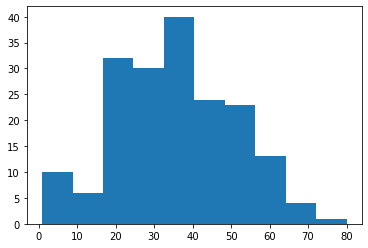

In [82]:
plt.hist(titanic.Age)

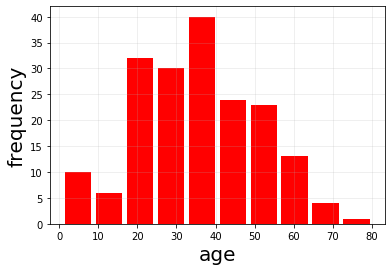

In [83]:
plt.hist(titanic.Age.dropna(), color='r', rwidth=0.85)
plt.xlabel('age', fontsize=20)
plt.ylabel('frequency', fontsize=20)
plt.grid(alpha=0.25)

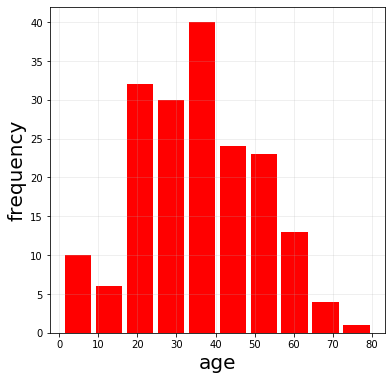

In [84]:
fig = plt.figure(figsize=(6, 6))
plt.hist(titanic.Age.dropna(), color='r', rwidth=0.85)
plt.xlabel('age', fontsize=20)
plt.ylabel('frequency', fontsize=20)
plt.grid(alpha=0.25)
plt.savefig('my_histogram.pdf')

## Creating a scatterplot

In [85]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


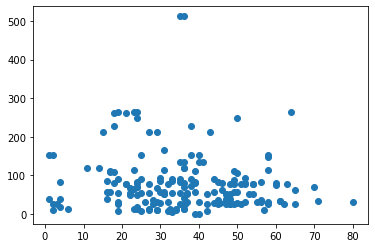

In [86]:
plt.scatter(titanic.Age, titanic.Fare)

In [87]:
iris = pd.read_csv('data/iris.csv')

In [88]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Text(0, 0.5, 'petal length')

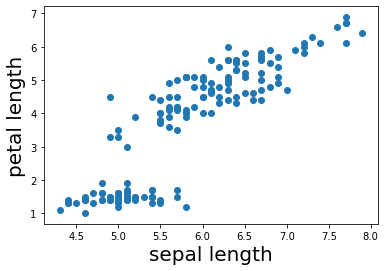

In [89]:
plt.scatter(iris.sepal_length, iris.petal_length)
plt.xlabel('sepal length', fontsize=20)
plt.ylabel('petal length', fontsize=20)

In [90]:
classes = iris['class'].unique()
class2df = {}
for class_ in classes:
    class2df[class_] = iris[iris['class'] == class_]
class2df

{'Iris-setosa':     sepal_length  sepal_width  petal_length  petal_width        class
 0            5.1          3.5           1.4          0.2  Iris-setosa
 1            4.9          3.0           1.4          0.2  Iris-setosa
 2            4.7          3.2           1.3          0.2  Iris-setosa
 3            4.6          3.1           1.5          0.2  Iris-setosa
 4            5.0          3.6           1.4          0.2  Iris-setosa
 5            5.4          3.9           1.7          0.4  Iris-setosa
 6            4.6          3.4           1.4          0.3  Iris-setosa
 7            5.0          3.4           1.5          0.2  Iris-setosa
 8            4.4          2.9           1.4          0.2  Iris-setosa
 9            4.9          3.1           1.5          0.1  Iris-setosa
 10           5.4          3.7           1.5          0.2  Iris-setosa
 11           4.8          3.4           1.6          0.2  Iris-setosa
 12           4.8          3.0           1.4          0.1  Iri

Text(0.5, 0, 'sepal length')

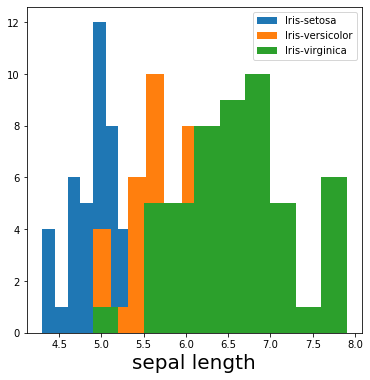

In [91]:
fig = plt.figure(figsize=(6, 6))
for class_, df in class2df.items():
    plt.hist(df.sepal_length, label=class_)
plt.legend()
plt.xlabel('sepal length', fontsize=20)

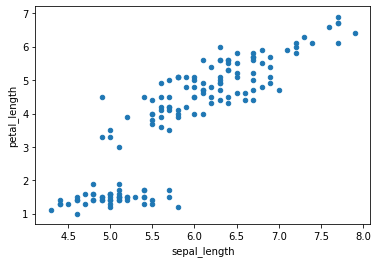

In [92]:
iris.plot(x='sepal_length', y='petal_length', kind='scatter')

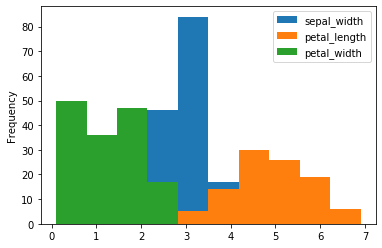

In [93]:
iris.plot(x='sepal_length', kind='hist')